In [0]:
https://github.com/darleybarreto/vae-pytorch

SyntaxError: ignored

In [0]:
import torch
import torchvision as tv
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import MNIST
import os

if not os.path.exists('./vae_img'):
    os.mkdir('./vae_img')


def to_img(x):
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

def to_img_3(x, h, w):
#     x = 0.5 * (x + 1)
#     x = x.clamp(0, 1)
    x = x.view(x.size(0), 3, h, w)
    return x
  
  
num_epochs = 50
batch_size = 128
learning_rate = 1e-3
""
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Loading and Transforming data
transform = transforms.Compose([transforms.ToTensor(),  transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247,            0.243, 0.261))])
trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247, 0.243, 0.261))])
trainset = tv.datasets.CIFAR10(root='./data',  train=True,download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, num_workers=4)
testset = tv.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

0it [00:00, ?it/s]

170500096it [00:02, 60069866.24it/s]                               


Files already downloaded and verified


In [0]:
# ls drive/My\ Drive/MNIST
ls data

cifar-10-batches-py/  cifar-10-python.tar.gz


In [0]:
# cp MNIST drive/My\ Drive/MNIST -rf
# ls drive/My\ Drive/MNIST
# ls 

In [0]:
dd = next(iter(dataloader))
img, _  = dd
print(img.shape)


c = img.view([img.shape[0], -1])
c.shape
# a = torch.arange(1, 17)
# b = a.reshape([4,4])
# b.shape
# b.view()

torch.Size([32, 3, 32, 32])


torch.Size([32, 3072])

In [0]:
dataloader.__dict__

{'_DataLoader__initialized': True,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x7f5e18a9ec88>,
 'batch_size': 32,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate>,
 'dataset': Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train,
 'drop_last': False,
 'num_workers': 4,
 'pin_memory': False,
 'sampler': <torch.utils.data.sampler.SequentialSampler at 0x7f5e18a9eb38>,
 'timeout': 0,
 'worker_init_fn': None}

In [0]:
ls

data/  dc_img_cifar/  drive/  sample_data/  vae_img/


In [0]:
# for data in dataloader:
#   img, _ = data
#   print(img.shape)

import os
!mkdir dc_img_cifar

In [0]:

# Writing our model
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder,self).__init__()
        
#         self.encoder = nn.Sequential(
#             nn.Conv2d(3, 28, kernel_size=3),
#             nn.ReLU(True),
#             nn.Conv2d(28,16,kernel_size=3),
#             nn.ReLU(True),
#             nn.Conv2d(16,1,kernel_size=5),
#             nn.ReLU(True))
        
#         self.decoder = nn.Sequential(             
#             nn.ConvTranspose2d(1,16,kernel_size=3),
#             nn.ReLU(True),            
#             nn.ConvTranspose2d(16,16,kernel_size=3),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(16,3,kernel_size=5),
#             nn.ReLU(True),
#             nn.Sigmoid())

#         self.encoder = nn.Sequential(
#             nn.Conv2d(3, 6, kernel_size=5),
#             nn.ReLU(True),
#             nn.Conv2d(6,16,kernel_size=5),
#             nn.ReLU(True),
#             nn.Conv2d(16,16, kernel_size=5),
#             nn.ReLU(True),
#             nn.Conv2d(16,1, stride = 2, kernel_size=5),
#             nn.ReLU(True)        
#         )
        
#         self.decoder = nn.Sequential(             
#             nn.ConvTranspose2d(1,16,kernel_size=5),
#             nn.ReLU(True),            
#             nn.ConvTranspose2d(16,16,kernel_size=5),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(16,3,kernel_size=5),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(3,3,kernel_size=5),
#             nn.ReLU(True),            
#             nn.ConvTranspose2d(3,3,kernel_size=5),
#             nn.ConvTranspose2d(3,3,kernel_size=5),
#             nn.ReLU(True),            
#             nn.Sigmoid())        

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,3,kernel_size=5),
            nn.ReLU(True),
            nn.Sigmoid())
    def forward(self,x):
        z = self.encoder(x)
        x = self.decoder(z)
        return x, z
      
      
#defining some params
# num_epochs = 5 #you can go for more epochs, I am using a mac
# batch_size = 128      

num_epochs = 2
  
      
model = autoencoder().cuda()
from torchsummary import summary
summary(model, (3, 32, 32))    

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                             weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        
#         import pdb; pdb.set_trace()
#         img = img.view(img.size(0), -1)
        img = Variable(img).cuda()
        # ===================forward=====================
        output, _ = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.data))
    if epoch % 10 == 0:
        pic = to_img_3(output.cpu().data, 32, 32)
        save_image(pic, './dc_img_cifar/image_{}.png'.format(epoch))
        pic_orig = to_img_3(img.cpu().data, 32, 32)
        save_image(pic_orig, './dc_img_cifar/image_orig_{}.png'.format(epoch))
        

# torch.save(model.state_dict(), './conv_autoencoder_cifar.pth')
# torch.save(model.state_dict(), './drive/My Drive/AutoEncoderProject/conv_autoencoder_cifar.pth')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
            Conv2d-3           [-1, 16, 24, 24]           2,416
              ReLU-4           [-1, 16, 24, 24]               0
   ConvTranspose2d-5            [-1, 6, 28, 28]           2,406
              ReLU-6            [-1, 6, 28, 28]               0
   ConvTranspose2d-7            [-1, 3, 32, 32]             453
              ReLU-8            [-1, 3, 32, 32]               0
           Sigmoid-9            [-1, 3, 32, 32]               0
Total params: 5,731
Trainable params: 5,731
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.35
Params size (MB): 0.02
Estimated Total Size (MB): 0.39
-----------------------------------------------

In [0]:
# # torch.__version__
# from torchsummary import summary
# summary(model, (1, 28, 28))
# data[0].shape

In [0]:
loss.data

tensor(0.7757, device='cuda:0')

In [0]:
ls

data/  dc_img_cifar/  drive/  sample_data/  vae_img/


In [0]:
mkdir dc_img_cifar/

In [0]:
# from matplotlib import pyplot as plt
help(os.path.join)


Help on function join in module posixpath:

join(a, *p)
    Join two or more pathname components, inserting '/' as needed.
    If any component is an absolute path, all previous path components
    will be discarded.  An empty last part will result in a path that
    ends with a separator.



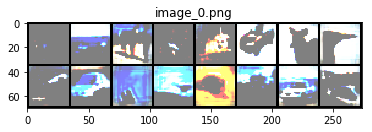

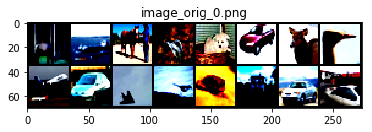

In [0]:
from matplotlib import pyplot as plt
files = os.listdir('./dc_img_cifar/')
files.sort()
for f in files:
  plt.figure()
  a = plt.imread(os.path.join('./dc_img_cifar/', f))
  plt.imshow(a)
  plt.title(f)
  


In [0]:
files.sort()
files

['image_0.png', 'image_orig_0.png']

In [0]:
# test the model
# output = model(img)
# img.shape
# c.shape
# img.shape
# output.shape
# c.shape
cp -r ./dc_img_cifar/ ./drive/My\ Drive/AutoEncoderProject

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-1.3862) tensor(1.0084)
torch.Size([1, 16, 24, 24])
tensor(-1.4814) tensor(2.1309)
torch.Size([1, 16, 24, 24])
tensor(-1.6561) tensor(1.6395)
torch.Size([1, 16, 24, 24])
tensor(-1.4106) tensor(1.5176)
torch.Size([1, 16, 24, 24])
tensor(-1.3873) tensor(1.5828)
torch.Size([1, 16, 24, 24])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-1.6293) tensor(2.1309)
torch.Size([1, 16, 24, 24])
tensor(-1.3544) tensor(2.1309)
torch.Size([1, 16, 24, 24])
tensor(-1.5809) tensor(1.5193)
torch.Size([1, 16, 24, 24])
tensor(-1.6777) tensor(1.7747)
torch.Size([1, 16, 24, 24])
tensor(-1.9101) tensor(1.6790)
torch.Size([1, 16, 24, 24])


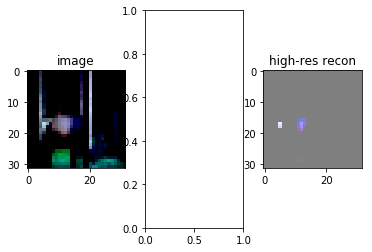

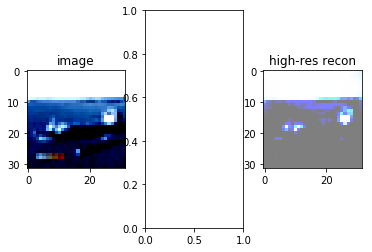

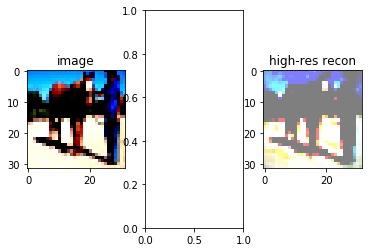

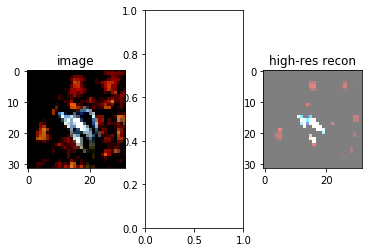

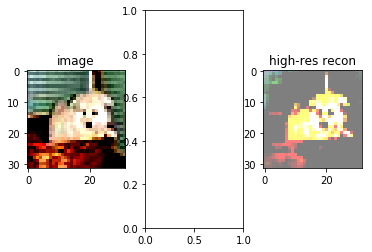

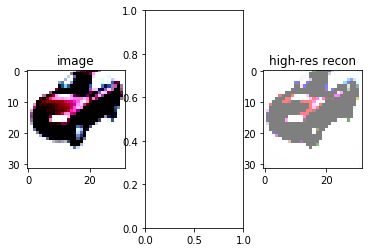

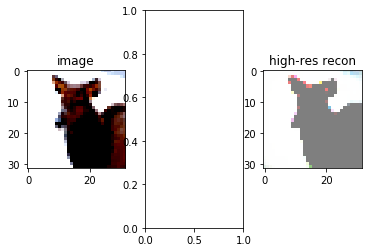

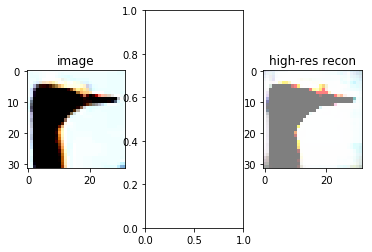

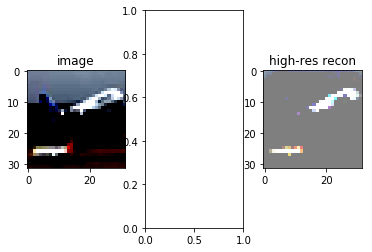

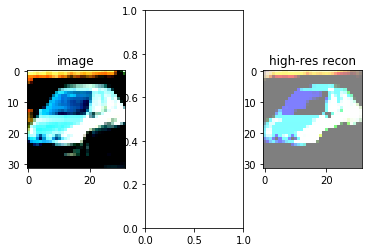

In [0]:

import matplotlib.pyplot as plt
import numpy as np

def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
#     image = image + 0.5
#     image = image + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
# for idx, image in enumerate(images):
#     axes[idx].imshow(convert_to_imshow_format(image))
#     axes[idx].set_title(classes[labels[idx]])
#     axes[idx].set_xticks([])
#     axes[idx].set_yticks([])

import matplotlib.pyplot as plt

for i in range(10):
  
  f, axarr = plt.subplots(1, 3)

  c = img[i].cpu().detach()
  print(torch.min(c), torch.max(c))
#   c = c.reshape([28,28])  
#   c = to_img_3(c,32,32)
#   c = c.squeeze()
#   import pdb; pdb.set_trace()
#   c = c.reshape(32,32,3)
  axarr[0].imshow(convert_to_imshow_format(c))
  axarr[0].set_title('image')  
  
  aaa= img[i].reshape(1,3,32,32)
  output_hr, code = model(aaa)

  c = code.cpu().detach()
  print(c.shape)
#   c = c.reshape([32,32])
#   axarr[1].imshow(c.numpy())
#   axarr[1].set_title('code')   
  
  
  
  a = output_hr #reshape([32,32])
  a = a.cpu().detach()  
  axarr[2].imshow(convert_to_imshow_format(a.squeeze()))
  axarr[2].set_title('high-res recon')  

  
  

In [0]:
c.shape

torch.Size([1, 16, 24, 24])

In [0]:
# output.shape
# c.reshape(32,32,3).shape
# c.shape
# code.shape
cc = img[i].cpu().detach()
torch.max(cc)
# cc.shape

tensor(1.6790)

RuntimeError: ignored

In [0]:
import torchvision

num_epochs = 1

def resize_tensor(input_tensors, h, w):
  final_output = None
  batch_size, channel, height, width = input_tensors.shape
#   import pdb; pdb.set_trace()
  input_tensors = torch.squeeze(input_tensors, 1)
  
  for img in input_tensors:
    img_PIL = transforms.ToPILImage()(img)
    img_PIL = torchvision.transforms.Resize([h,w])(img_PIL)
    img_PIL = torchvision.transforms.ToTensor()(img_PIL)
    if final_output is None:
      final_output = img_PIL
    else:
      final_output = torch.cat((final_output, img_PIL), 0)
  final_output = torch.unsqueeze(final_output, 1)
  return final_output

def custom_loss(output, img): #nn.MSELoss()
    h1, w1 = 10, 10 #output2.shape[2:]
#     img_lr = img.view(-1, 3, 32, 32)
#     img_lr = resize_tensor(img_lr.cpu(), h1, w1 )
# #     print(img_lr.shape)
#     img_lr = img_lr.resize(img_lr.shape[0]//3,3,10,10)
    
#     import pdb; pdb.set_trace()
#     

#     img_lr = img_lr.reshape(-1,h1*w1)
#     out2 = output2.view(-1, 1, 28, 28)
    return nn.MSELoss()(output, img)



# def custom_loss(output, img): #nn.MSELoss()
#     h1, w1 = 10, 10 #output2.shape[2:]
#     img_lr = img.view(-1, 3, 32, 32)
#     img_lr = resize_tensor(img_lr.cpu(), h1, w1 )
# #     print(img_lr.shape)
#     img_lr = img_lr.resize(img_lr.shape[0]//3,3,10,10)
    
# #     import pdb; pdb.set_trace()
# #     

# #     img_lr = img_lr.reshape(-1,h1*w1)
# #     out2 = output2.view(-1, 1, 28, 28)
#     return  nn.MSELoss()(output1, img_lr.cuda()) + nn.MSELoss()(output2, img)



#  --------------------

class autoencoder_two_branch(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(16,16, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(16,1, stride = 2, kernel_size=5),
            nn.ReLU(True)        
        )
        
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(1,16,kernel_size=5),
            nn.ReLU(True),            
            nn.ConvTranspose2d(16,16,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(16,3,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(3,3,kernel_size=5),
            nn.ReLU(True),            
            nn.ConvTranspose2d(3,3,kernel_size=5),
            nn.ConvTranspose2d(3,3,kernel_size=5),
            nn.ReLU(True),            
            nn.Sigmoid())        

    def forward(self, x):
        z = self.encoder(x)
#         x1 = self.decoder1(z)  # low res
        x = self.decoder(z)  # high res    
        return x, z


  
model = autoencoder_two_branch().cuda()
from torchsummary import summary
summary(model, (3, 32, 32))    

batch_size = 32

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                             weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        
#         import pdb; pdb.set_trace()
#         img = img.view(img.size(0), -1)
        img = Variable(img).cuda()
        # ===================forward=====================
        output, _ = model(img)
        loss = custom_loss(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.data))
    if epoch % 10 == 0:
        pic = to_img_3(output.cpu().data, 32, 32)
        save_image(pic, './dc_img_cifar/image_{}.png'.format(epoch))
        pic_orig = to_img_3(img.cpu().data, 32, 32)
        save_image(pic_orig, './dc_img_cifar/image_orig_{}.png'.format(epoch))
        

torch.save(model.state_dict(), './conv_autoencoder_cifar_2br.pth')
torch.save(model.state_dict(), './drive/My Drive/AutoEncoderProject/conv_autoencoder_cifar_2br.pth')

  

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
            Conv2d-3           [-1, 16, 24, 24]           2,416
              ReLU-4           [-1, 16, 24, 24]               0
            Conv2d-5           [-1, 16, 20, 20]           6,416
              ReLU-6           [-1, 16, 20, 20]               0
            Conv2d-7              [-1, 1, 8, 8]             401
              ReLU-8              [-1, 1, 8, 8]               0
   ConvTranspose2d-9           [-1, 16, 12, 12]             416
             ReLU-10           [-1, 16, 12, 12]               0
  ConvTranspose2d-11           [-1, 16, 16, 16]           6,416
             ReLU-12           [-1, 16, 16, 16]               0
  ConvTranspose2d-13            [-1, 3, 20, 20]           1,203
             ReLU-14            [-1, 3,

In [0]:
#     h1, w1 = 10, 10 #output2.shape[2:]
#     img_lr = img.view(-1, 3, 32, 32)
#     img_lr = resize_tensor(img_lr.cpu(), h1, w1 )
#     img_lr = img_lr.resize(32,3,10,10)
# #     

# #     img_lr = img_lr.reshape(-1,h1*w1)
# #     out2 = output2.view(-1, 1, 28, 28)
#     return  nn.MSELoss()(output1, img_lr.cuda()) + nn.MSELoss()(output2, img)


In [0]:
# output2.shape
# img2 = img.view(-1, 1, 28, 28)
# img2.shape
# batch_size

z_code = torch.randn(100, 20).cuda()   #for vae
evaluate_x[:,None,...].shape

128

In [0]:
mkdir dc_img2

In [0]:
# img[:,::2].shape
img2 = img.reshape(-1, 1, 28, 28)

In [0]:
import math
math.sqrt(392)

19.79898987322333

In [0]:
img2.shape

torch.Size([128, 1, 28, 28])

In [0]:
a = resize_tensor(img2.cpu(), 10, 10)

In [0]:
a.shape

torch.Size([128, 1, 10, 10])

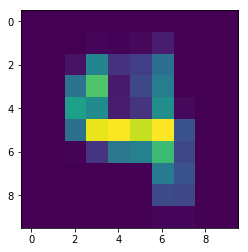

In [0]:
import matplotlib.pyplot as plt
plt.imshow(a[0,0])

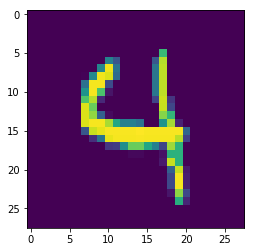

In [0]:
plt.imshow(img2.cpu()[0,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

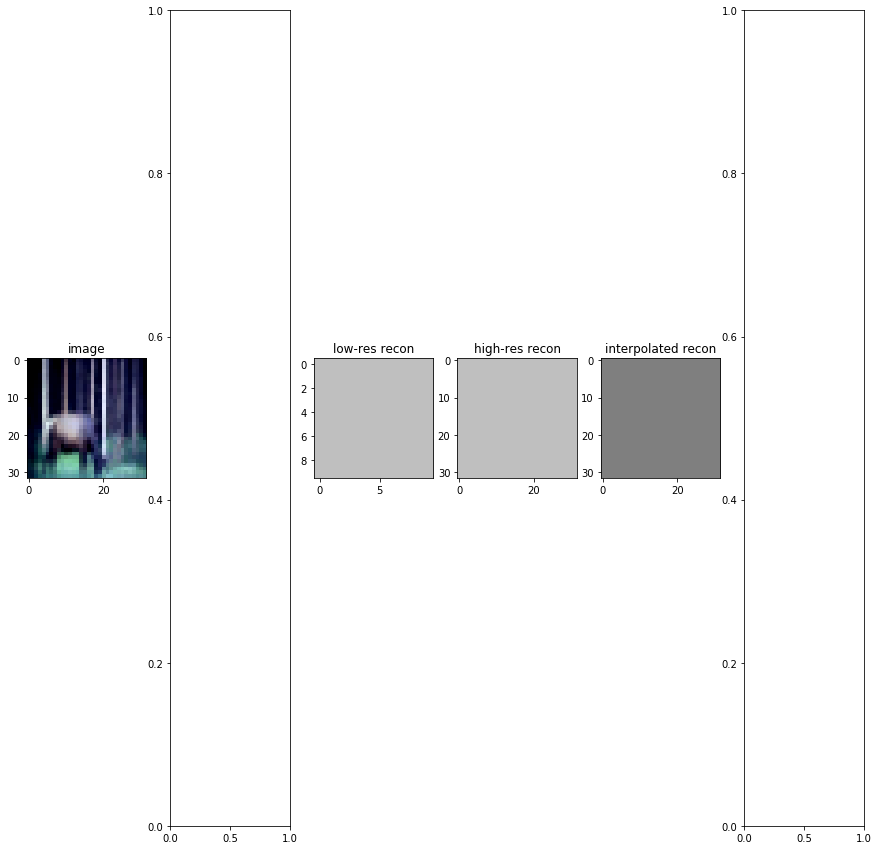

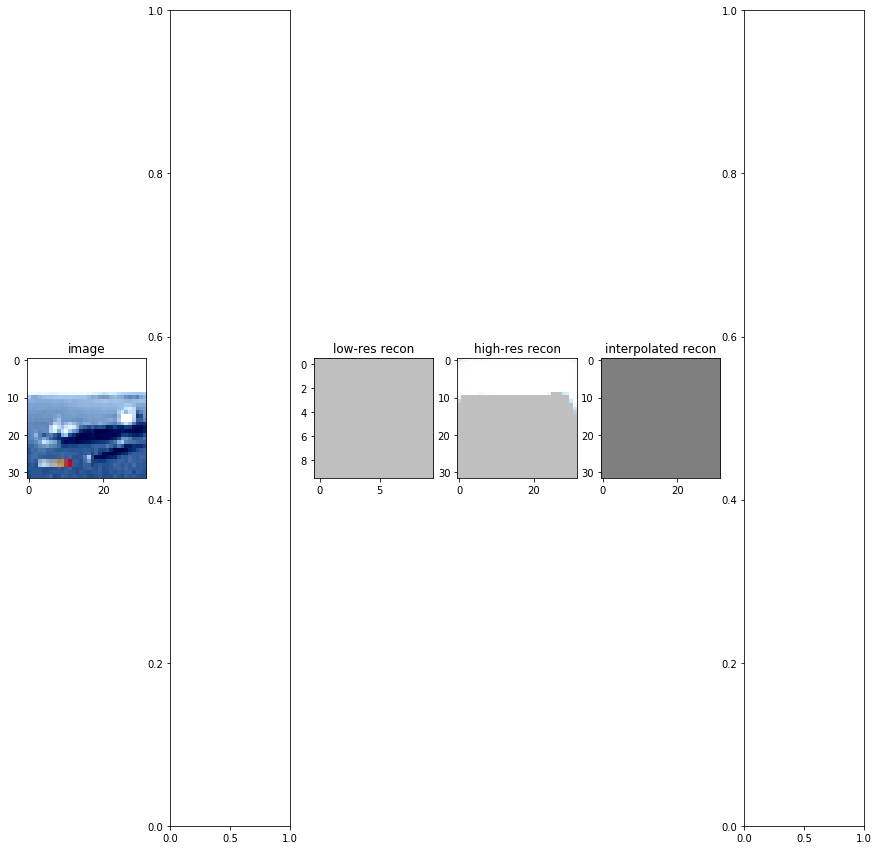

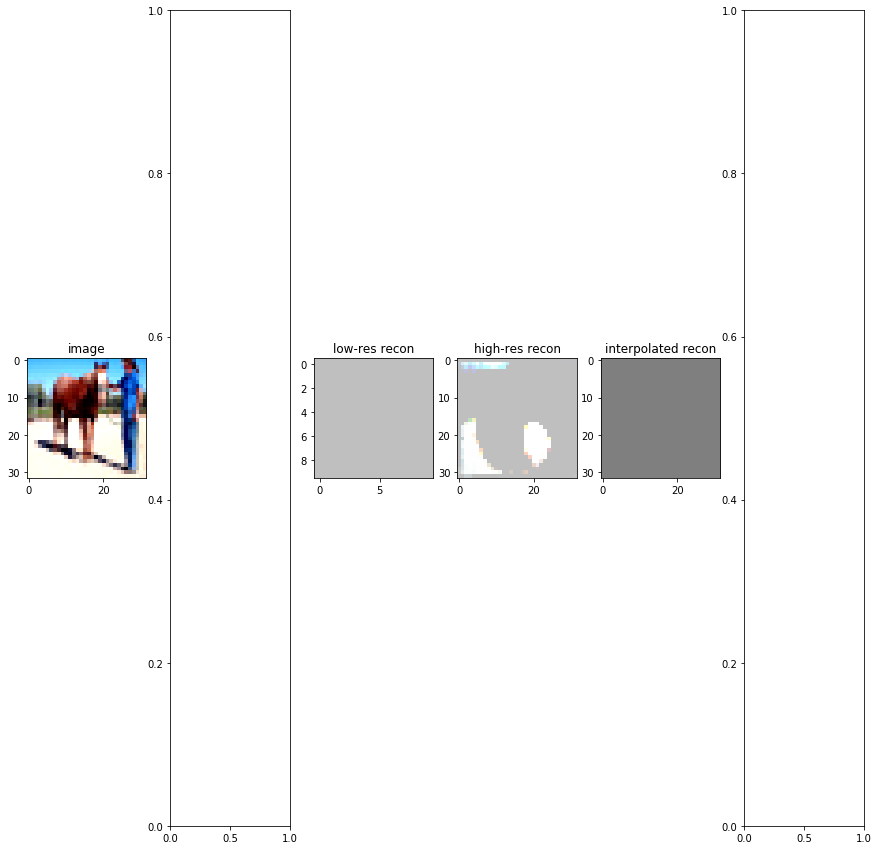

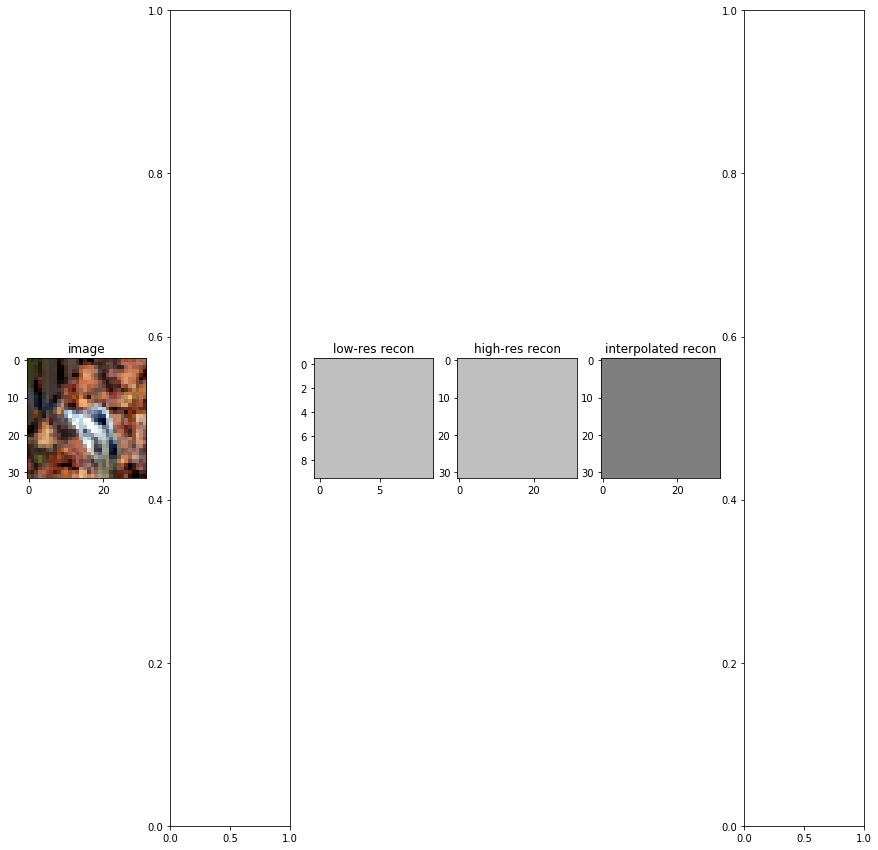

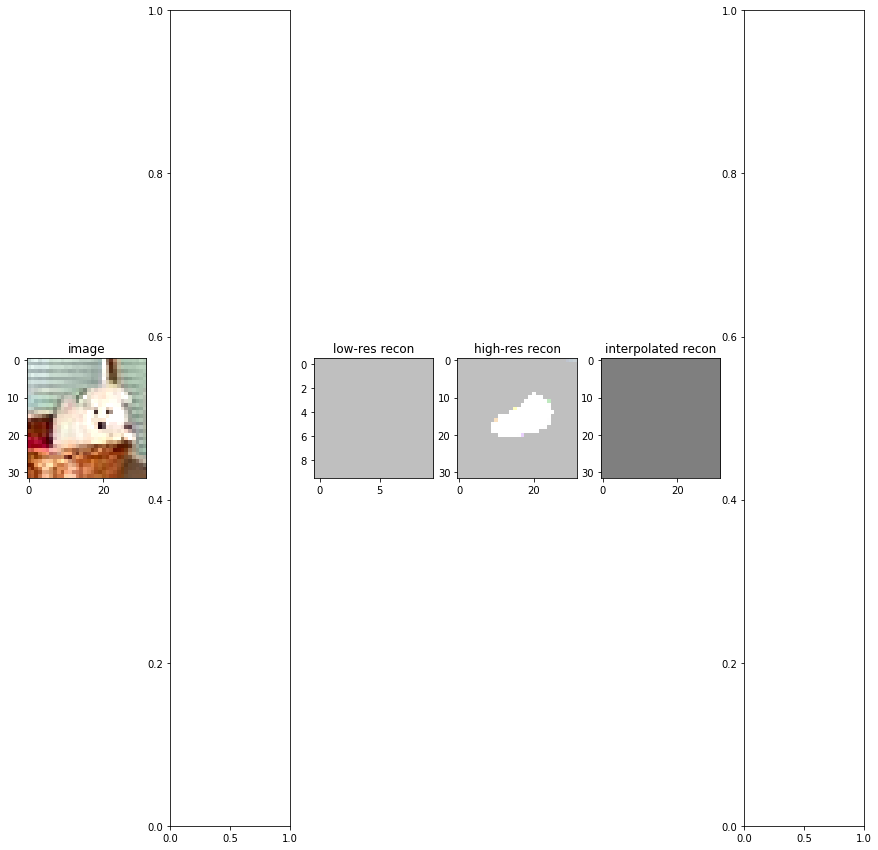

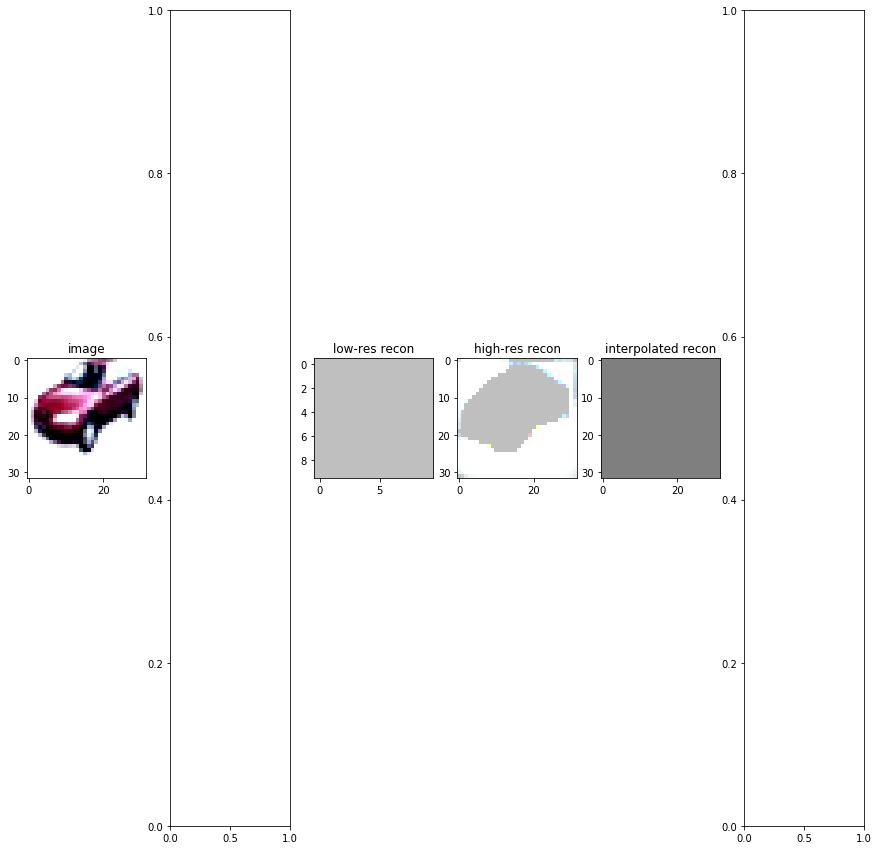

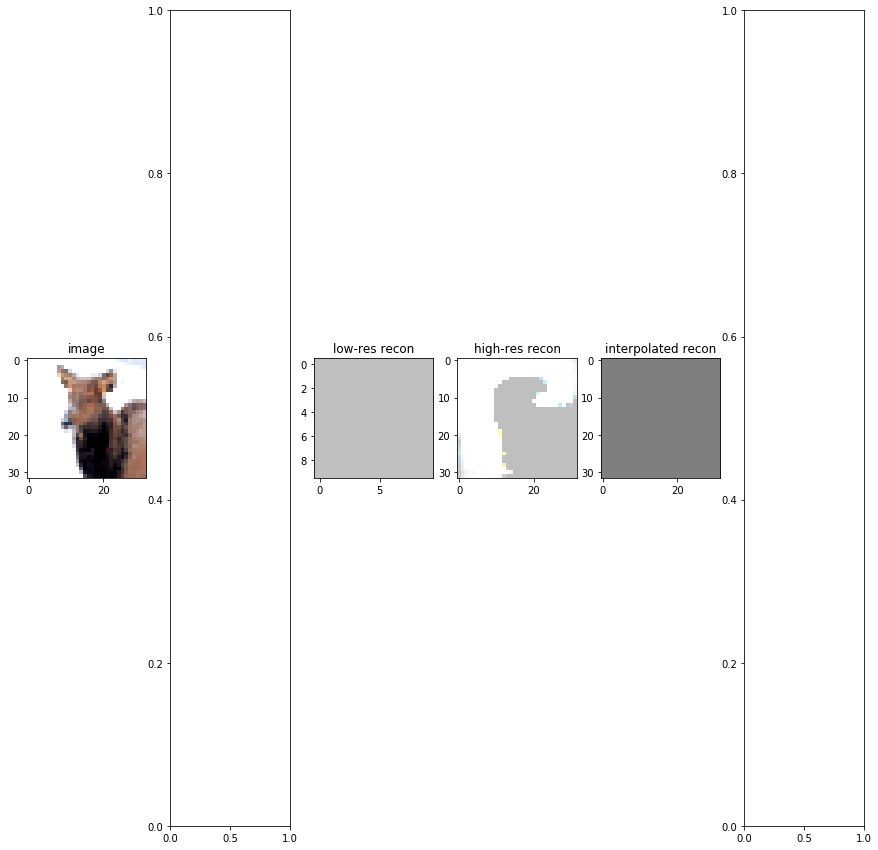

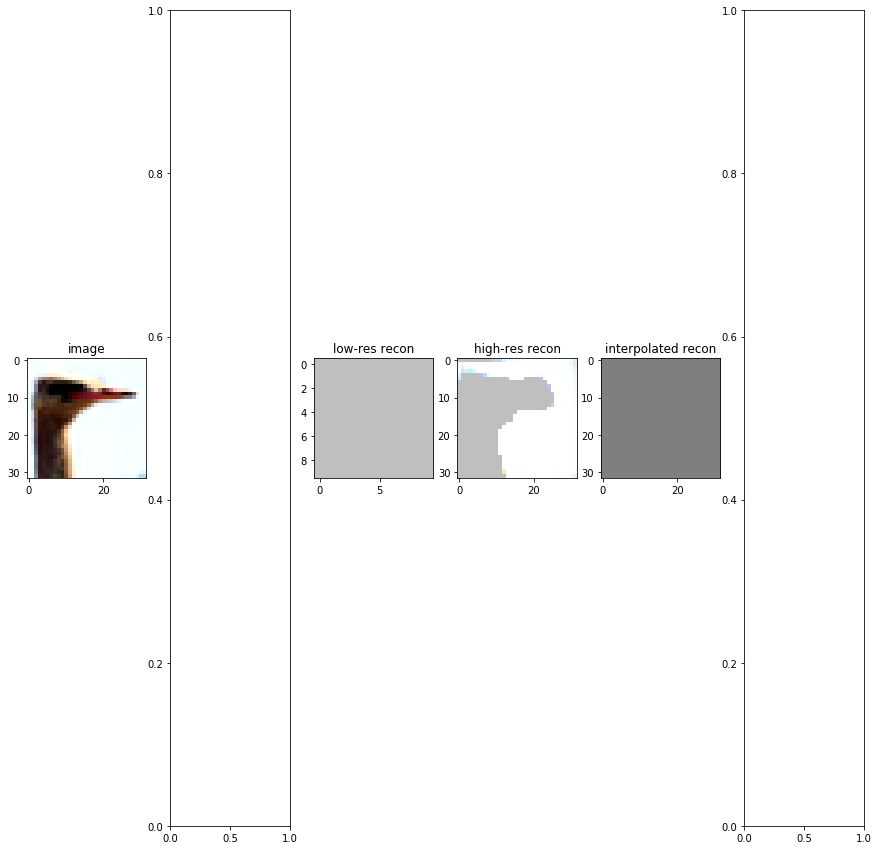

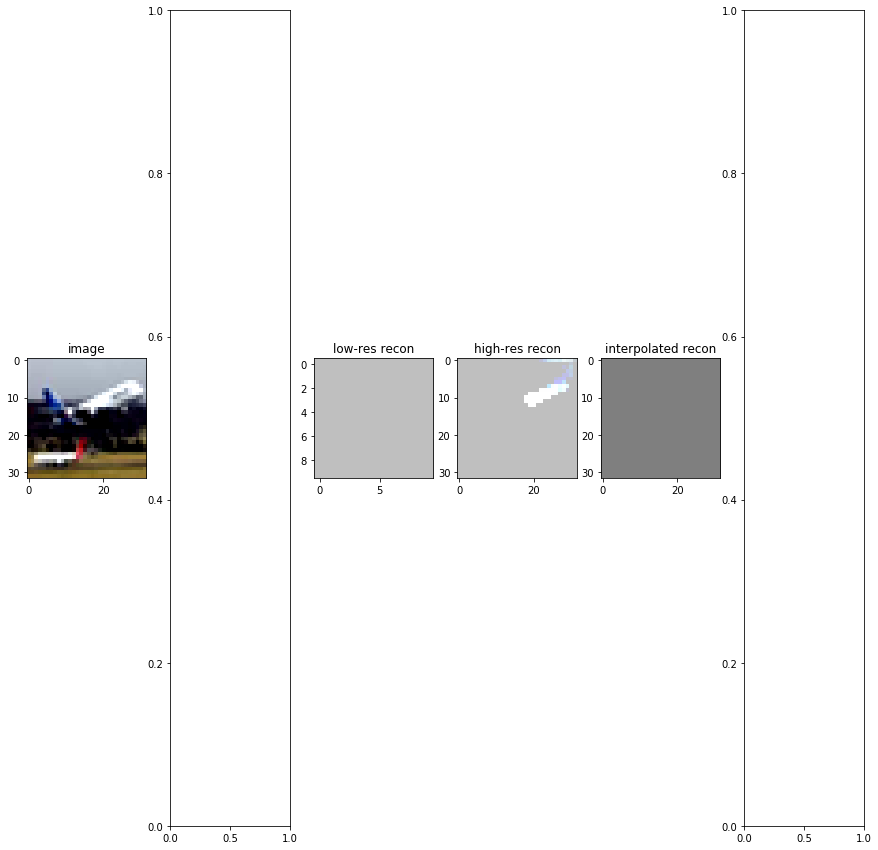

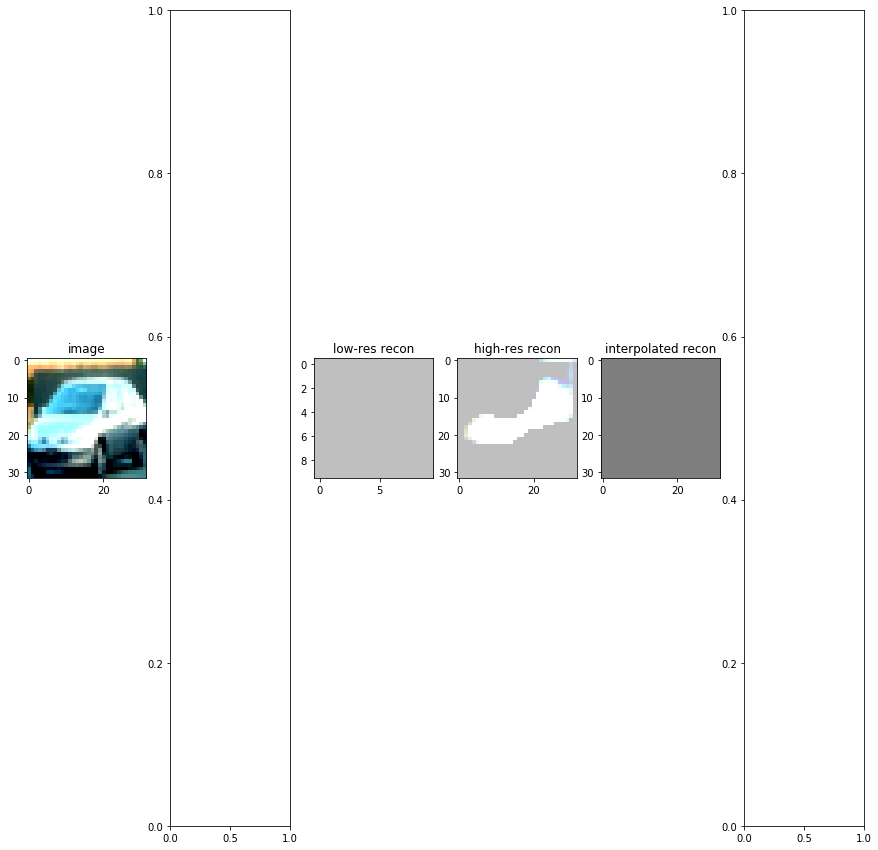

In [0]:
import cv2
import matplotlib.pyplot as plt
# pallete = np.zeros(10*28,28*4)

for i in range(10):
  
  f, axarr = plt.subplots(1, 6, figsize=(15,15))

  c = img[i].cpu().detach()
#   c = c.reshape([28,28])  
#   c = to_img_3(c,32,32)
#   c = c.squeeze()
#   import pdb; pdb.set_trace()
#   c = c.reshape(32,32,3)
  axarr[0].imshow(convert_to_imshow_format(c))
  axarr[0].set_title('image')  
  
  aaa= img[i].reshape(1,3,32,32)
  output_lr, output_hr, code = model(aaa)

  
  
#   c = code.cpu().detach()
#   print(c.shape)
#   c = c.reshape([20,20])
#   axarr[1].imshow(c.numpy())
#   axarr[1].set_title('code')   
  
  a = output_lr# .reshape([10,10])
  a = a.cpu().detach()
  axarr[2].imshow(convert_to_imshow_format(a.squeeze()))
  axarr[2].set_title('low-res recon')  

  
  a = output_hr #reshape([32,32])
  a = a.cpu().detach()  
  axarr[3].imshow(convert_to_imshow_format(a.squeeze()))
  axarr[3].set_title('high-res recon')  

  
#   interpol_img = cv2.resize(output_lr.cpu().detach().numpy().squeeze(), (32,32))
#   interpol_img.shape
  aa = output_lr.cpu().detach().numpy().squeeze()
  aa = aa.transpose(1,2,0)
  interpol_img = cv2.resize(aa, (32,32))  
#   interpol_img = resize_tensor(aa, 100, 100)
#   a = interpol_img.reshape([100,100])
#   a = a.cpu().detach()
  axarr[4].imshow(interpol_img)
  axarr[4].set_title('interpolated recon') 
  
  # super resolution
#   a = output_hr.reshape([28,28])
#   a = a.cpu().detach()
#   axarr[5].imshow(a.numpy())
#   axarr[5].set_title('high-res recon')   
  
#   pallete[:i*28, :28] = c 
 


In [0]:
output_lr.shape
# a = output_lr.reshape([10,10])
# a = output_lr.reshape([10,10])
# output_lr.cpu().detach().numpy().squeeze()
interpol_img = cv2.resize(output_lr.cpu().detach().numpy().squeeze(), (32,32))
interpol_img.shape
aa = output_lr.cpu().detach().numpy().squeeze()
aa = aa.transpose(1,2,0)
aa.shape

(10, 10, 3)

In [0]:
# resize_tensor(output_lr.cpu(), 28, 28)
output_lr.shape

torch.Size([1, 3, 10, 10])

In [0]:
import cv2

In [0]:
aa = cv2.resize(output_lr.cpu().detach().numpy().squeeze(), (28,28))


In [0]:
aa.shape

(28, 28)